In [1]:
from train_new import train_model
from test import MySummarizer

def main():
    # Training the model
    train_model()

    # Loading the trained weights
    weights_path = 'weights_new.ckpt'
    model_name = "digit82/kobart-summarization"

    # Create the summarizer
    summarizer = MySummarizer(model_name, weights_path)

    # Get text input from user
    example_text = input("Enter the text you want to summarize: ")

    # Generate and print summary
    summary = summarizer.generate_summary(example_text)
    print("Generated Summary:", summary)

if __name__ == '__main__':
    main()

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Step,Training Loss,Validation Loss
5,6.712700,6.078211
10,6.379500,5.840589
15,6.244500,5.498766
20,5.754800,5.106279
25,5.286200,4.669096
30,4.873500,4.240152
35,4.452800,3.808633
40,3.953200,3.358873
45,3.539400,2.943405
50,3.118000,2.467460


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Enter the text you want to summarize:  (대구=연합뉴스) 박세진 기자 = 대구시는 김선조 신임 행정부시장이 오는 4일 취임한다고 3일 밝혔다.  김 부시장은 취임식을 생략하고 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다.  그는 부산 출신으로 서울대 철학과를 졸업했고 37회 행정고시에 합격해 1994년 4월 공직에 입문했다.  환경부, 울산시 안전행정국장, 울산 중·동구 부구청장, 행정자치부 지역발전과장, 울산시·부산시 기획조정실장, 행정안전부 균형발전지원관 등을 거쳤다.  대구에서는 1995년 환경부 대구지방환경청 소속으로 1년간 근무한 바 있다.  김 부시장은 "대구가 대한민국 3대 도시의 영광을 되찾도록 행정 업무 경험과 전문성을 살리겠다"고 말했다.


Generated Summary: 3일 대구시는 4일 취임하는 김선조 신임 행정부시장이 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다고 밝혔다.


In [2]:
from tensorboard.backend.event_processing import event_accumulator

log_path = './new_logs'  # Change this to your log directory

# Load TensorBoard events
event_acc = event_accumulator.EventAccumulator(log_path)
event_acc.Reload()

# Extract scalars
scalar_tags = event_acc.Tags()['scalars']

for tag in scalar_tags:
    if 'train/loss' in tag:
        print(f"\nTraining Scalar Tag: {tag}")
    elif 'eval/loss' in tag:
        print(f"\nValidation Scalar Tag: {tag}")
 
    events = event_acc.Scalars(tag)
    for event in events:
        print(f"Step: {event.step}, Value: {event.value}")


Training Scalar Tag: train/loss
Step: 5, Value: 6.712699890136719
Step: 10, Value: 6.379499912261963
Step: 15, Value: 6.244500160217285
Step: 20, Value: 5.754799842834473
Step: 25, Value: 5.286200046539307
Step: 30, Value: 4.873499870300293
Step: 35, Value: 4.4527997970581055
Step: 40, Value: 3.953200101852417
Step: 45, Value: 3.539400100708008
Step: 50, Value: 3.118000030517578
Step: 5, Value: 4.999999987376214e-07
Step: 10, Value: 9.999999974752427e-07
Step: 15, Value: 1.500000053056283e-06
Step: 20, Value: 1.9999999949504854e-06
Step: 25, Value: 2.499999936844688e-06
Step: 30, Value: 3.000000106112566e-06
Step: 35, Value: 3.5000000480067683e-06
Step: 40, Value: 3.999999989900971e-06
Step: 45, Value: 4.500000159168849e-06
Step: 50, Value: 4.999999873689376e-06
Step: 5, Value: 5.0
Step: 5, Value: 5.0
Step: 10, Value: 10.0
Step: 10, Value: 10.0
Step: 15, Value: 15.0
Step: 15, Value: 15.0
Step: 20, Value: 20.0
Step: 20, Value: 20.0
Step: 25, Value: 25.0
Step: 25, Value: 25.0
Step: 30, 

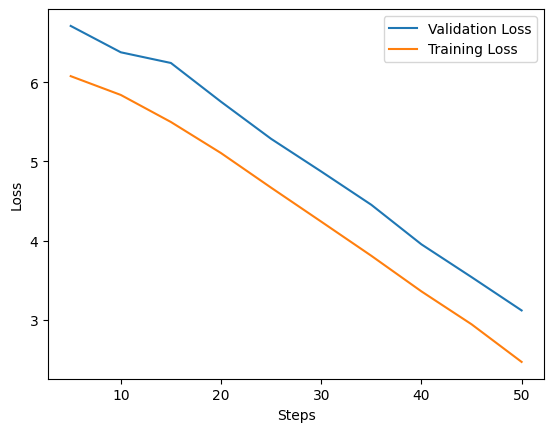

In [3]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

log_path = './new_logs'  # Change this to your log directory

# Load TensorBoard events
event_acc = event_accumulator.EventAccumulator(log_path)
event_acc.Reload()

# Extract scalars
scalar_tags = event_acc.Tags()['scalars']

# Separate training and validation loss
train_loss_data = {}
val_loss_data = {}

for tag in scalar_tags:
    events = event_acc.Scalars(tag)

    for event in events:
        if 'train/loss' in tag:
            train_loss_data[event.step] = min(train_loss_data.get(event.step, float('inf')), event.value)
        elif 'eval/loss' in tag:
            val_loss_data[event.step] = min(val_loss_data.get(event.step, float('inf')), event.value)

# Convert data to lists for plotting
train_loss_steps, train_loss_values = zip(*sorted(train_loss_data.items()))
val_loss_steps, val_loss_values = zip(*sorted(val_loss_data.items()))

# Plotting
plt.plot(train_loss_steps, train_loss_values, label='Validation Loss')
plt.plot(val_loss_steps, val_loss_values, label='Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
from tensorboard.backend.event_processing import event_accumulator

log_path = './new_logs'  # Change this to your log directory

# Load TensorBoard events
event_acc = event_accumulator.EventAccumulator(log_path)
event_acc.Reload()

# Extract scalars
scalar_tags = event_acc.Tags()['scalars']

for tag in scalar_tags:
    events = event_acc.Scalars(tag)
    print(f"\nScalar Tag: {tag}")
    for event in events:
        print(f"Step: {event.step}, Value: {event.value}")


Scalar Tag: train/loss
Step: 10, Value: 6.578499794006348
Step: 20, Value: 5.920199871063232
Step: 30, Value: 5.091599941253662
Step: 40, Value: 4.195099830627441
Step: 50, Value: 3.2555999755859375

Scalar Tag: train/learning_rate
Step: 10, Value: 9.999999974752427e-07
Step: 20, Value: 1.9999999949504854e-06
Step: 30, Value: 3.000000106112566e-06
Step: 40, Value: 3.999999989900971e-06
Step: 50, Value: 4.999999873689376e-06

Scalar Tag: train/epoch
Step: 10, Value: 10.0
Step: 20, Value: 20.0
Step: 30, Value: 30.0
Step: 40, Value: 40.0
Step: 50, Value: 50.0
Step: 50, Value: 50.0

Scalar Tag: train/train_runtime
Step: 50, Value: 241.1033935546875

Scalar Tag: train/train_samples_per_second
Step: 50, Value: 0.621999979019165

Scalar Tag: train/train_steps_per_second
Step: 50, Value: 0.2070000022649765

Scalar Tag: train/total_flos
Step: 50, Value: 11432559116288.0

Scalar Tag: train/train_loss
Step: 50, Value: 5.008189678192139


In [9]:
text = '''(대구=연합뉴스) 박세진 기자 = 대구시는 김선조 신임 행정부시장이 오는 4일 취임한다고 3일 밝혔다.  김 부시장은 취임식을 생략하고 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다.  
그는 부산 출신으로 서울대 철학과를 졸업했고 37회 행정고시에 합격해 1994년 4월 공직에 입문했다.  
환경부, 울산시 안전행정국장, 울산 중·동구 부구청장, 행정자치부 지역발전과장, 울산시·부산시 기획조정실장, 행정안전부 균형발전지원관 등을 거쳤다.  대구에서는 1995년 환경부 대구지방환경청 소속으로 1년간 근무한 바 있다.  
김 부시장은 "대구가 대한민국 3대 도시의 영광을 되찾도록 행정 업무 경험과 전문성을 살리겠다"고 말했다.
Generated Summary: 3일 대구시는 4일 취임하는 김선조 신임 행정부시장이 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다고 밝혔다.'''

In [3]:
from test import MySummarizer

def main(text):

    # Loading the trained weights
    weights_path = 'weights_new.ckpt'
    model_name = "digit82/kobart-summarization"

    # Create the summarizer
    summarizer = MySummarizer(model_name, weights_path)

    # Generate and print summary
    summary = summarizer.generate_summary(text)
    print("Generated Summary:", summary)

if __name__ == '__main__':
    main(text)

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Generated Summary: 3일 대구시는 4일 취임하는 김선조 신임 행정부시장이 취임식을 생략하고 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다고 밝혔다.


In [8]:
text

'(대구=연합뉴스) 박세진 기자 = 대구시는 김선조 신임 행정부시장이 오는 4일 취임한다고 3일 밝혔다.  김 부시장은 취임식을 생략하고 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다.  \n그는 부산 출신으로 서울대 철학과를 졸업했고 37회 행정고시에 합격해 1994년 4월 공직에 입문했다.  \n환경부, 울산시 안전행정국장, 울산 중·동구 부구청장, 행정자치부 지역발전과장, 울산시·부산시 기획조정실장, 행정안전부 균형발전지원관 등을 거쳤다.  대구에서는 1995년 환경부 대구지방환경청 소속으로 1년간 근무한 바 있다.  \n김 부시장은 "대구가 대한민국 3대 도시의 영광을 되찾도록 행정 업무 경험과 전문성을 살리겠다"고 말했다.\n        Generated Summary: 3일 대구시는 4일 취임하는 김선조 신임 행정부시장이 홍준표 대구시장 주재 간부회의에 참석하는 것으로 일정을 시작한다고 밝혔다.'